# Matlab Translation

- [x] Image Resizing
- [x] Connected Components
- [x] Image Smoothing (filters)
- [ ] Image Sharpning (filters)

In [1]:
import cv2 
import numpy as np

In [2]:
img = cv2.imread("foot.png")

In [3]:
img.shape

(168, 65, 3)

# This image is a thermogram mapped to intensity values to rgb

(-0.5, 64.5, 167.5, -0.5)

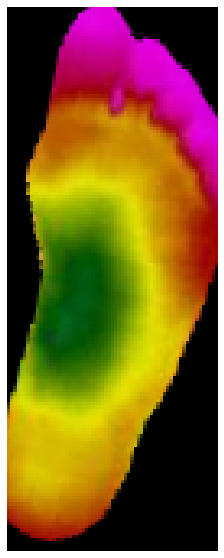

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img2 = Image.fromarray(img)

img2g = np.array(img2.convert("L"))
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis("off")

# Image Scaling and Resizing

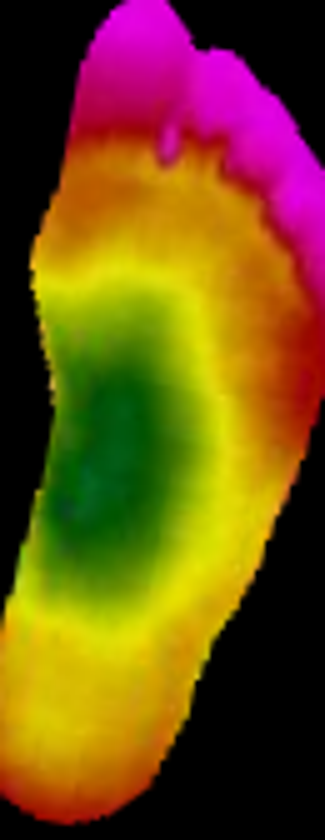

In [5]:
scale = 5
from PIL import Image
import numpy as np

img2 = Image.fromarray(img)


img2.resize(np.array((np.array(img2.size) * scale), dtype=np.int64))


# Connected Components

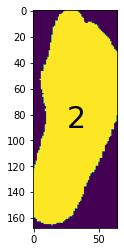

In [6]:
k = cv2.connectedComponents(np.array(img2.convert("L")))
plt.text(k[1].shape[1]/2, k[1].shape[0]/2, "%d"%k[0], ha="center",va="center", fontsize=30)
plt.imshow(k[1])

# Smoothing filters

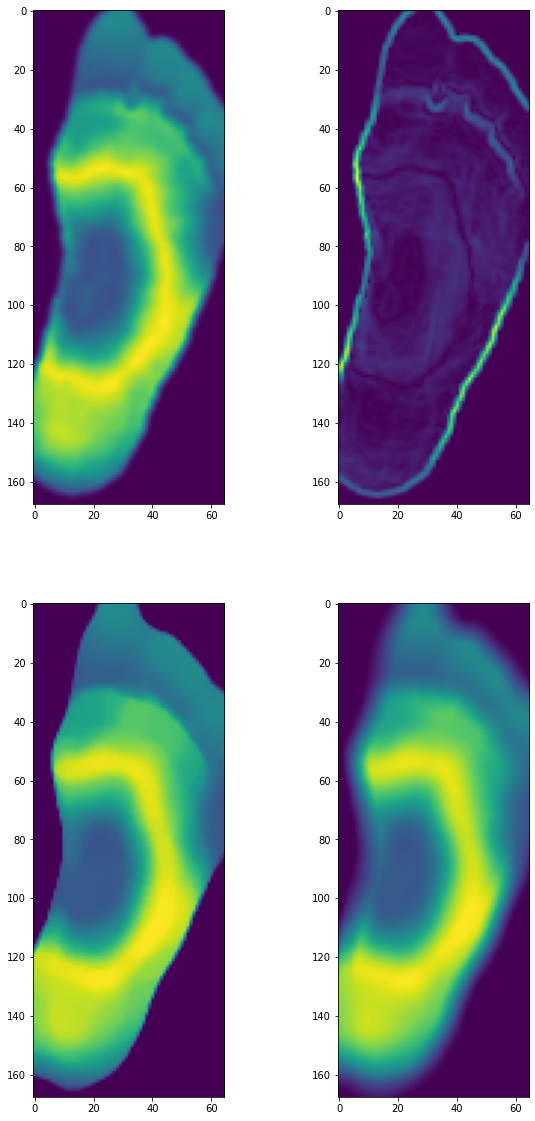

In [7]:
from skimage.filters import gaussian, sobel
from skimage.filters.rank import mean, median
from skimage.morphology import disk, ball
from skimage import filters



fig, ax = plt.subplots(2, 2, figsize=(10, 20))
ax[0][0].imshow(gaussian(img2g))
ax[0][1].imshow(sobel(img2g))

ax[1][0].imshow(median(img2g, disk(5)))
ax[1][1].imshow(mean(img2g, disk(5)))


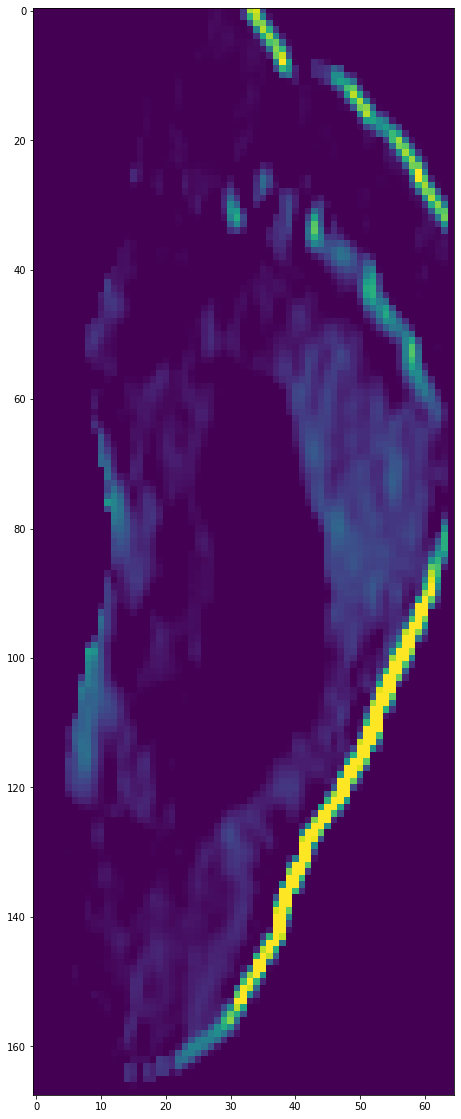

In [8]:
c_img = cv2.filter2D(img2g, -1, np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]))

plt.figure(figsize=(10, 20))
plt.imshow(c_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7999999999999998..2.533333333333334].


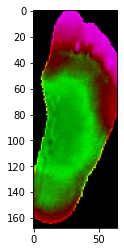

In [9]:
from skimage.filters import laplace


plt.imshow(laplace(img))

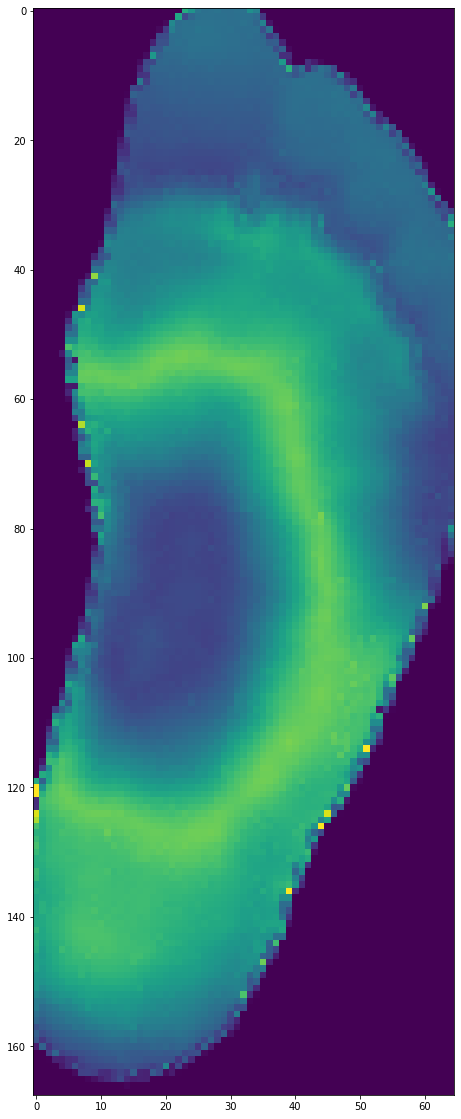

In [10]:
l_img = cv2.filter2D(img2g, -1, np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]))

plt.figure(figsize=(10, 20))
plt.imshow(img2g + l_img)

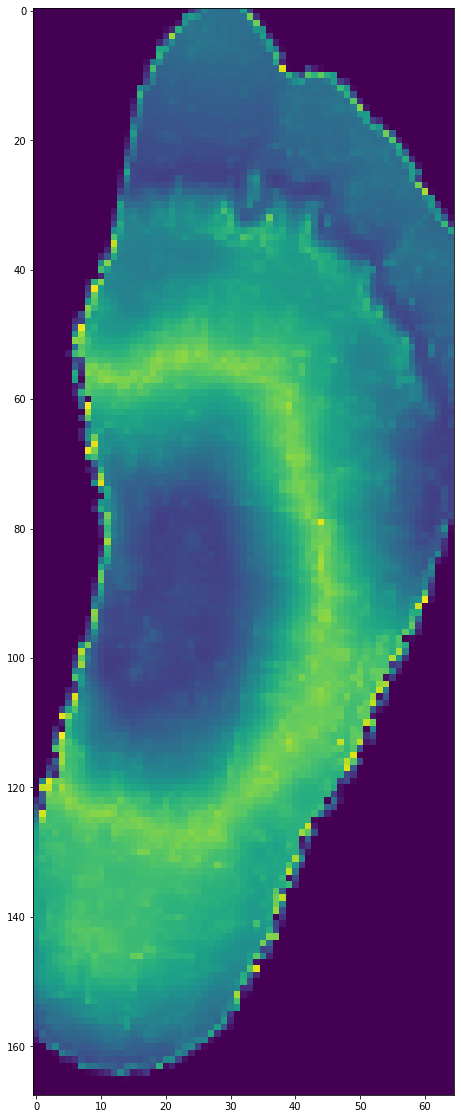

In [11]:
l_img = cv2.filter2D(img2g, -1, np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
]))

plt.figure(figsize=(10, 20))
plt.imshow(img2g + l_img)

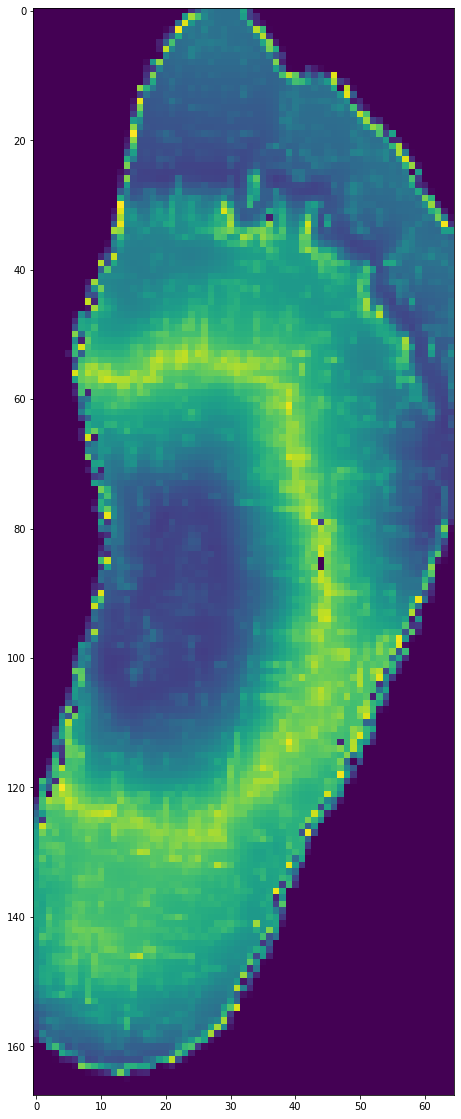

In [12]:
l_img = cv2.filter2D(img2g, -1, np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]))

plt.figure(figsize=(10, 20))
plt.imshow(img2g + l_img)

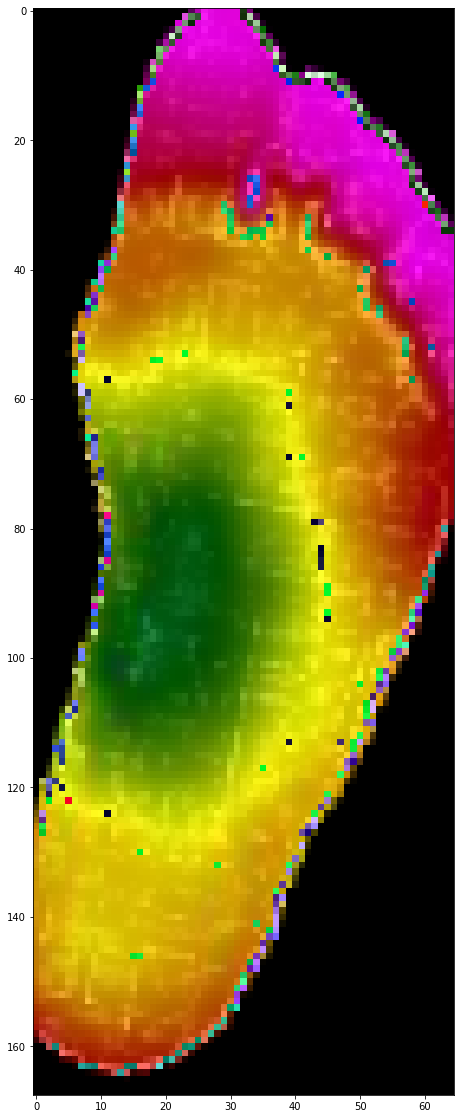

In [13]:
imga = img
a = np.tile(np.expand_dims(l_img, axis=-1), (1, 1, 3))
imga = imga + a 
plt.figure(figsize=(10, 20))
plt.imshow(imga)

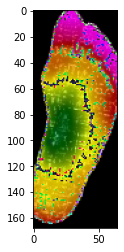

In [14]:
mask = imga - img
plt.imshow(img + mask * 3)

# Sharper Image By combining horzontal and vertical sobel filtered images

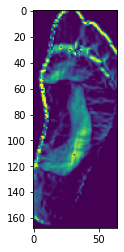

In [15]:
from scipy.ndimage import sobel

# Sobel kernels
sobel_x = sobel(np.identity((3)), axis=0)
sobel_y = sobel(np.identity((3)), axis=1)


img_x = cv2.filter2D(img2g, -1, sobel_x)
img_y = cv2.filter2D(img2g, -1, sobel_y)

plt.imshow(img_x + img_y)

# Color Space Exploration
- [ ] Use New Dataset to map to different colors
- [ ] Significance of HSV and other color space
- [ ] convert to color space/color model/color system

# Map Dataset Images to color

In [16]:
# Path of dataset

sample_img = "foot1.png"

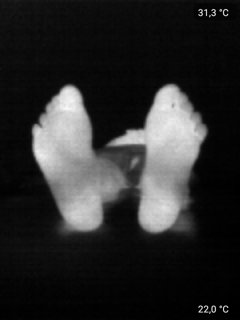

In [17]:
# Printing the image

from PIL import Image
fimg = Image.open(sample_img).convert("L")
fimg = fimg.resize((int(fimg.width/2), int(fimg.height/2)))
fimga = np.array(fimg)

fimg

In [18]:
def clerp(p1, p2, val):
    colder = np.array(p1)
    hotter = np.array(p2)
    p3 = np.array(colder + val * (hotter - colder), dtype=np.uint8)
    return p3

In [19]:
def tocolor(ir_img, func):
    img = np.zeros(shape=(ir_img.shape[0], ir_img.shape[1], 3))
    for row in range(len(ir_img)):
        for cell in range(len(ir_img[0])):
            img[row][cell] = func(ir_img[row][cell])
            
            
    return img

# In Rainbow colorspace

- V -> R
- Colder -> Hotter

In [20]:
def mapper (intensity):
    if intensity in range(50, 100):
        nin = ((intensity - 50) / (100 - 50))
        return (int(nin * 255) , 0, 0)
    if intensity in range(100, 200): 
        nin = ((intensity - 100) / (200 - 100))
        return (0, int(nin * 255), 0)
    if intensity in range(200, 255):
        nin = ((intensity - 200) / (255 - 200))
        return (0, 0, int(nin * 255))
    return (0, 0, 0)

def mapper_rainbow (intensity):
    return clerp([0, 255, 0], [255, 0, 0], intensity / 100)

In [21]:
col1 = tocolor(fimga, mapper_rainbow)
col2 = tocolor(fimga, mapper)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..252.0].


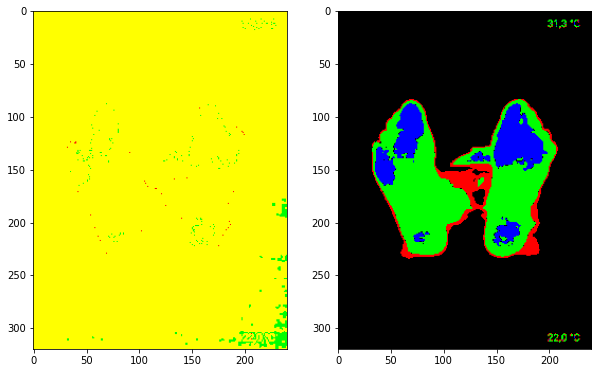

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(col1)
ax[1].imshow(col2)

In [23]:
rx = np.arange(0, 10, 1)
bx = np.arange(0, 10, 1)
gx = np.arange(0, 10, 1)

In [24]:
xx, yy, zz = np.meshgrid(rx, bx, gx)

In [25]:
a = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

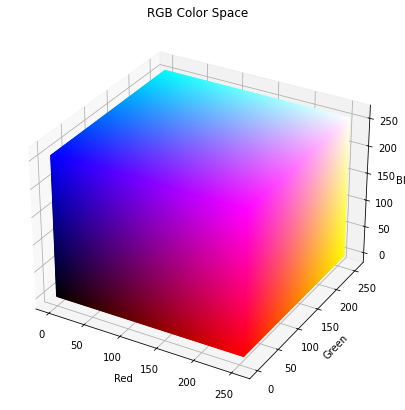

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

values = np.arange(256)
R, G, B = np.meshgrid(values, values, values, indexing='ij')

R_flat = R.flatten()
G_flat = G.flatten()
B_flat = B.flatten()

RGB_normalized = np.vstack((R_flat, G_flat, B_flat)).T / 255.0

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(R_flat, G_flat, B_flat, c=RGB_normalized, marker='o', s=1)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

ax.set_title('RGB Color Space')

plt.show()


# HSV

1. Hue : (0, 360) [True color]
2. Saturation : (0, 1) [more color less white]
3. V (Brightness) : (0, 1) [How Dark Or Bright a color is.]


In [47]:
k = np.vstack((R_flat, G_flat, B_flat)).T
k.shape

(16777216, 3)

In [43]:
v = np.arange(1, 10, 1)

In [59]:
k1, k2, k3 = np.meshgrid(v, v, v, indexing="ij")

In [65]:
u = np.c_[k1.ravel(), k2.ravel(), k3.ravel()]

In [78]:
import math




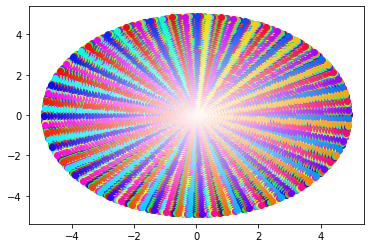

In [124]:
import colorsys as cs
max_radius = 5
for radius in np.arange(0, max_radius, 0.1):
    for ang in range(0, 361, 1):
        x = (radius * math.cos(ang / math.pi), radius * math.sin(ang/math.pi))
        h = (ang / 180 ) / 2*math.pi
        s = radius / max_radius
        v =  1 - s
        color=cs.hsv_to_rgb(h, s, 1)
        plt.plot(*x, "o", color=color)
    

In [6]:
import numpy as np
import math

radius = 100
img = np.zeros((radius * 2, radius * 2, 3), dtype=np.uint8)


def buildImage(img, radius, v = 1):
    center = np.array([radius, radius])
    for y in range(2 * radius):
        for x in range(2 * radius):
            cp = np.array([x, y])
            dx, dy = cp - center

            if (dx * dx + dy * dy) > radius **2:
                continue
            ang = np.arctan2(dy, dx) 


            hue = (ang + np.pi) / (2 * np.pi)
            sat = np.sqrt(dy**2 + dx**2) / radius
            img[y][x] = np.array(cs.hsv_to_rgb(hue, sat, v)) * 255
            
    return img



In [9]:
from matplotlib import animation
import matplotlib.pyplot as plt

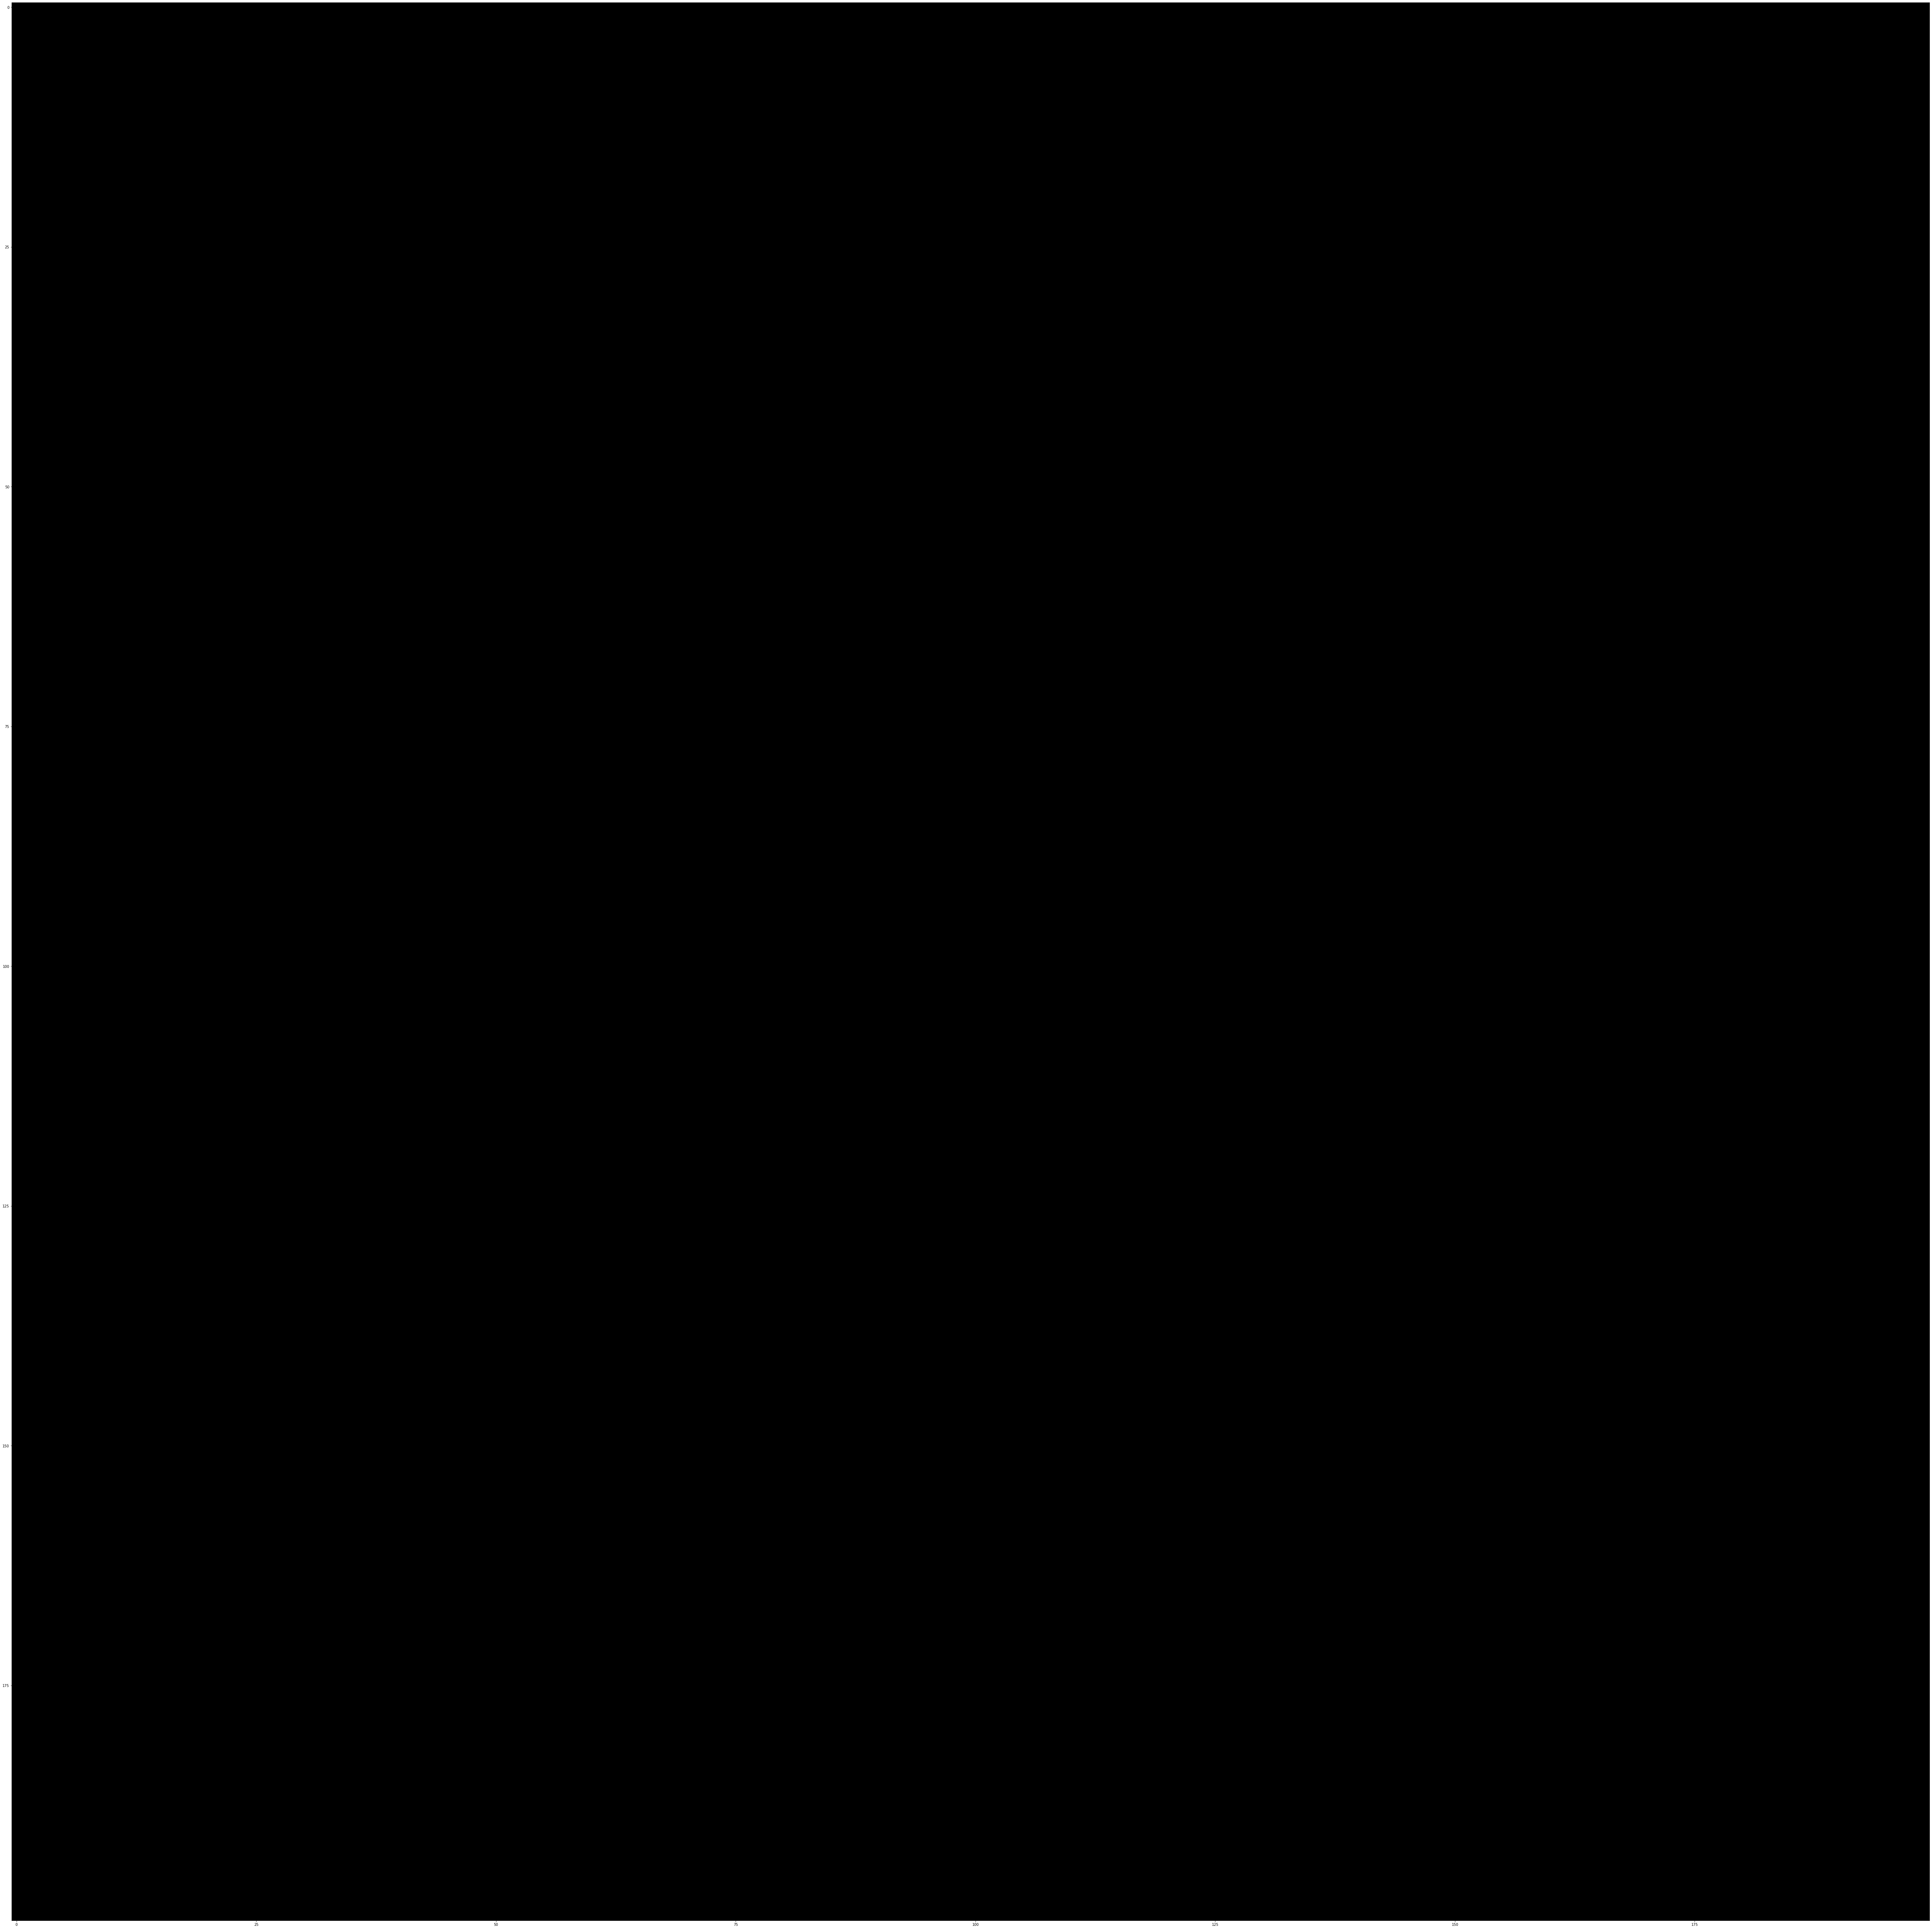

In [10]:
fig = plt.figure(figsize=(100, 100))
ax = fig.add_subplot()
ax.imshow(img)

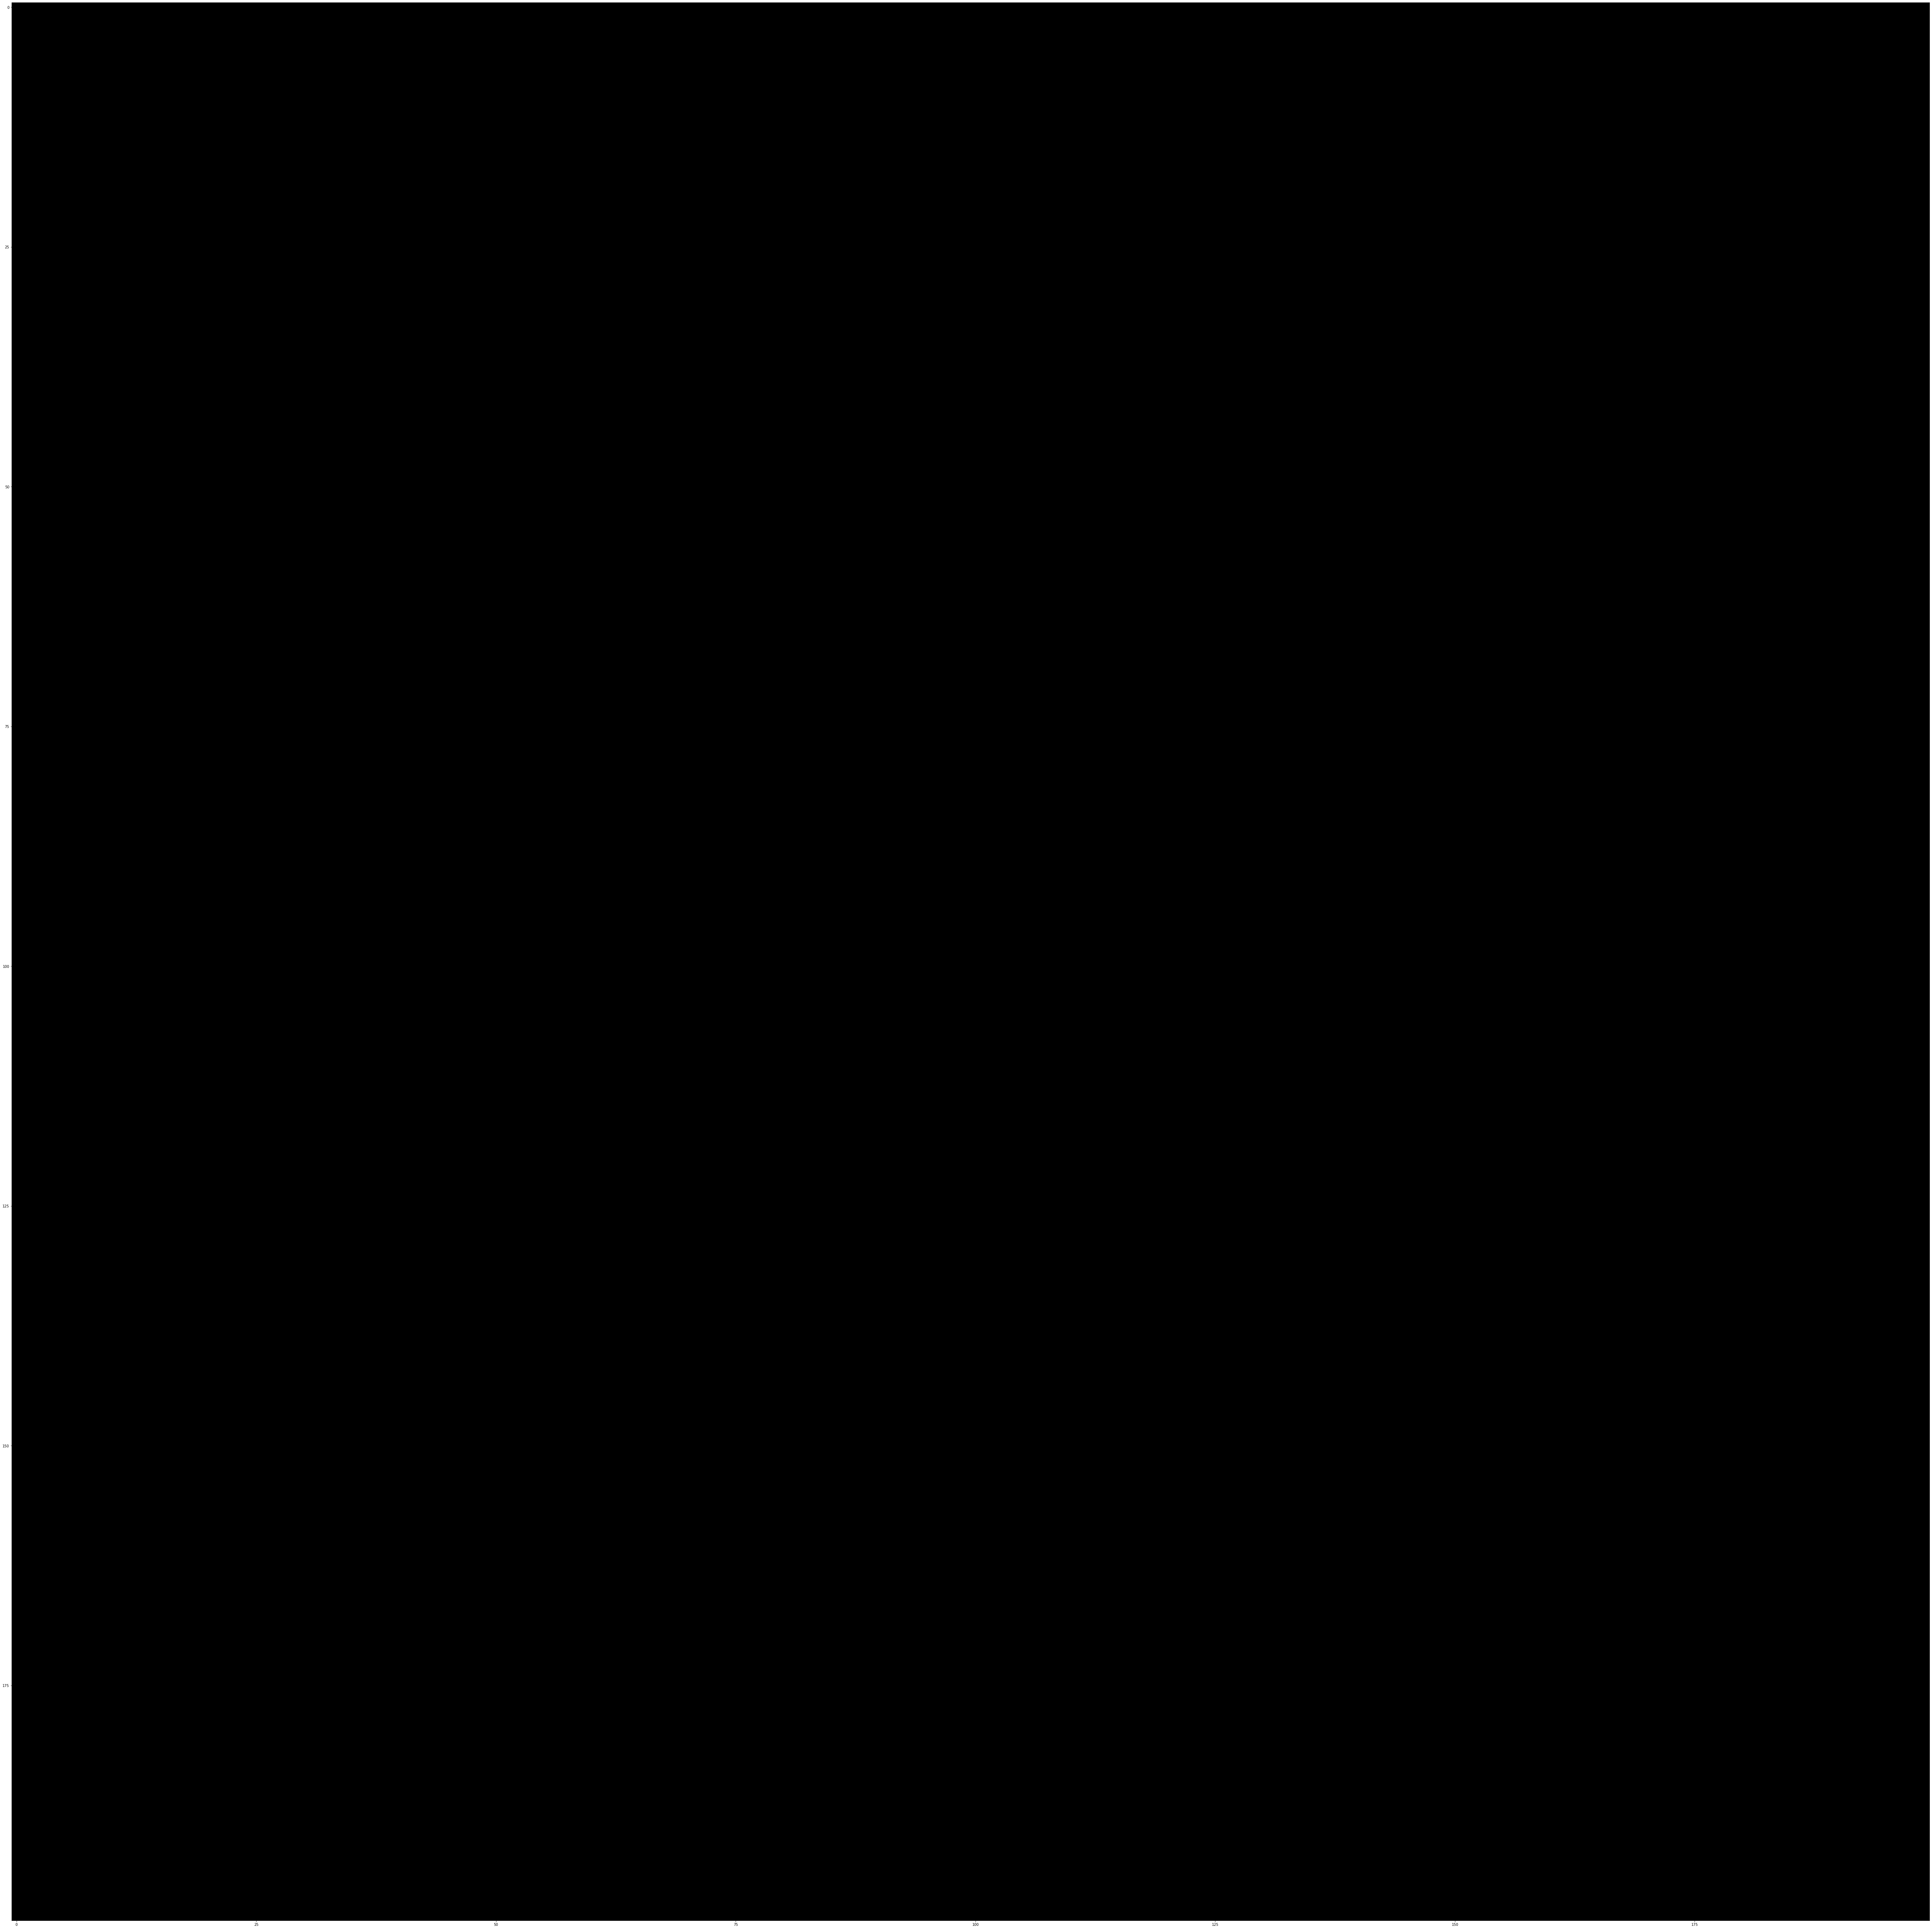

In [11]:
fig = plt.figure(figsize=(100, 100))
ax = fig.add_subplot()
im = ax.imshow(img)

In [13]:
import colorsys as cs
radius = 50
img1 = np.zeros((radius * 2, radius * 2, 3), dtype=np.uint8)
buildImage(img, radius, 0.2)
im.set_array(img)

In [16]:
def init():
    im = ax.imshow(img)
    return [im]

def update(frame):
    buildImage(img, radius, frame / 50)
    im.set_array(img)
    return [im]

ani = animation.FuncAnimation(
    fig, update, frames=2, init_func=init, interval=50, blit=True
)


In [18]:
%matplotlib widget

In [20]:
ani.save('sine_wave_animation.gif', writer='imagemagick')

MovieWriter stderr:
convert-im6.q16: cache resources exhausted `-' @ error/cache.c/OpenPixelCache/4095.



CalledProcessError: Command '['convert', '-size', '7200x7200', '-depth', '8', '-delay', '5.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'sine_wave_animation.gif']' returned non-zero exit status 1.